<a href="https://colab.research.google.com/github/gabrielalins-stack/programacao-estatistica/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1: Poisson via Inversão Recursiva

Implemente uma função `poisson_recursivo(lam)` que gera uma variável aleatória com distribuição Poisson($\lambda$) utilizando o método de inversão recursiva visto em sala.

1. Gere amostras de tamanho 10.000 para os seguintes valores de $\lambda$: 1, 5, 10, 50, 100.

2. Verifique empiricamente que a distribuição Binomial($n$, $p$) se aproxima de uma Poisson($\lambda$) quando $n$ é grande e $p = \lambda/n$.

   - Fixe $\lambda = 10$ e use $n = 1000$, $p = 0.01$.
   - Gere uma amostra de tamanho 1.000 de $X \sim \text{Binomial}(n, p)$.
   - Gere uma amostra de tamanho 1.000 de $Y \sim \text{Poisson}(\lambda)$ usando sua função.
   - Compare os histogramas das duas amostras.


(array([   2.,    3.,    5.,   19.,   30.,   52.,  129.,  146.,  193.,
         472.,  418.,  586.,  639., 1095.,  781.,  809., 1092.,  670.,
         608.,  764.,  396.,  300.,  240.,  262.,   94.,   77.,   61.,
          30.,   10.,   10.,    3.,    2.,    2.]),
 array([ 64.        ,  66.3030303 ,  68.60606061,  70.90909091,
         73.21212121,  75.51515152,  77.81818182,  80.12121212,
         82.42424242,  84.72727273,  87.03030303,  89.33333333,
         91.63636364,  93.93939394,  96.24242424,  98.54545455,
        100.84848485, 103.15151515, 105.45454545, 107.75757576,
        110.06060606, 112.36363636, 114.66666667, 116.96969697,
        119.27272727, 121.57575758, 123.87878788, 126.18181818,
        128.48484848, 130.78787879, 133.09090909, 135.39393939,
        137.6969697 , 140.        ]),
 <BarContainer object of 33 artists>)

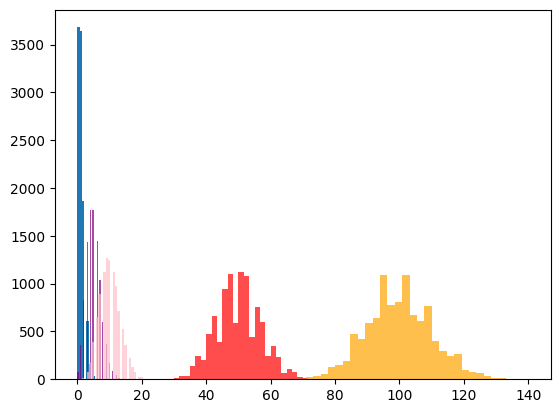

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def poisson_recursivo(lam):
  u = np.random.uniform(low= 0, high= 1)
  i = 0
  p0 = np.exp(-lam)
  f = p0
  while f < u:
    i += 1
    p0 = lam * p0 / i
    f += p0
  return i

amostra1 = []

for j in range(10000):
  a = poisson_recursivo(1)
  amostra1.append(a)
plt.hist(amostra1)

amostra2 = []

for j in range(10000):
  b = poisson_recursivo(5)
  amostra2.append(b)
plt.hist(amostra2, color = 'purple', alpha=0.7, bins=33)

amostra3 = []

for j in range(10000):
  c = poisson_recursivo(10)
  amostra3.append(c)
plt.hist(amostra3, color = 'pink', alpha=0.7, bins=33)

amostra4 = []

for j in range(10000):
  d = poisson_recursivo(50)
  amostra4.append(d)
plt.hist(amostra4, color = 'red', alpha=0.7, bins=33)

amostra5 = []

for j in range(10000):
  e = poisson_recursivo(100)
  amostra5.append(e)
plt.hist(amostra5, color = 'orange', alpha=0.7, bins=33)

(array([1.100e+01, 2.200e+01, 8.000e+01, 0.000e+00, 1.880e+02, 3.740e+02,
        5.980e+02, 0.000e+00, 9.620e+02, 1.135e+03, 0.000e+00, 1.216e+03,
        1.244e+03, 1.155e+03, 0.000e+00, 9.680e+02, 6.850e+02, 5.240e+02,
        0.000e+00, 3.550e+02, 2.100e+02, 0.000e+00, 1.310e+02, 7.200e+01,
        2.800e+01, 0.000e+00, 1.700e+01, 1.500e+01, 3.000e+00, 0.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00]),
 array([ 1.        ,  1.72727273,  2.45454545,  3.18181818,  3.90909091,
         4.63636364,  5.36363636,  6.09090909,  6.81818182,  7.54545455,
         8.27272727,  9.        ,  9.72727273, 10.45454545, 11.18181818,
        11.90909091, 12.63636364, 13.36363636, 14.09090909, 14.81818182,
        15.54545455, 16.27272727, 17.        , 17.72727273, 18.45454545,
        19.18181818, 19.90909091, 20.63636364, 21.36363636, 22.09090909,
        22.81818182, 23.54545455, 24.27272727, 25.        ]),
 <BarContainer object of 33 artists>)

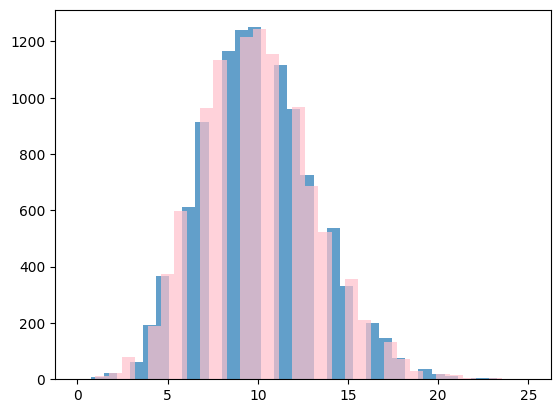

In [ ]:
def binomial2(n, p):
  u = np.random.uniform(low= 0, high=1)
  p_i = (1-p)**n
  f = p_i
  i = 0
  while u > f:
    p_i = ((n-i)*p*p_i)/((i+1)*(1-p))
    f += p_i
    i += 1
  return i

amostra_bin = []

for j in range(10000):
  a = binomial2(1000, 0.01)
  amostra_bin.append(a)

plt.hist(amostra_bin, alpha = 0.7, bins=33)

amostra_poisson = []

for j in range(10000):
  b = poisson_recursivo(10)
  amostra_poisson.append(b)
plt.hist(amostra_poisson, color = 'pink', alpha = 0.7, bins=33)


# Exercício 2: Geométrica

1. Implemente um gerador de variáveis aleatórias com distribuição Geométrica($p$) utilizando **dois métodos**:

   - **Versão ingênua (naive):** gerar sucessivamente variáveis Bernoulli($p$) até obter o primeiro sucesso;
   - **Versão via inversão:** como vimos nas notas de aula.

2. Para um valor fixo de $p$, gere uma amostra de tamanho $10^5$ utilizando ambos os métodos.

3. Compare os **tempos de execução** dos dois métodos.

4. Compare também as **densidades empíricas** obtidas com a distribuição gerada pela função `numpy.random.geometric`.

5. Repita a comparação dos tempos para valores pequenos e grandes de $p$ (por exemplo, $p = 0.1$ e $p = 0.9$) e discuta como isso afeta a eficiência de cada método.


Tempo: 1.0072648525238037


(array([5.1136e+04, 1.4660e+04, 1.0164e+04, 7.2960e+03, 5.0610e+03,
        5.9400e+03, 1.6640e+03, 1.2620e+03, 8.2300e+02, 6.0500e+02,
        4.2900e+02, 4.7300e+02, 1.5500e+02, 1.0700e+02, 6.5000e+01,
        5.9000e+01, 4.9000e+01, 1.5000e+01, 1.0000e+01, 7.0000e+00,
        4.0000e+00, 4.0000e+00, 7.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.        ,  2.18181818,  3.36363636,  4.54545455,  5.72727273,
         6.90909091,  8.09090909,  9.27272727, 10.45454545, 11.63636364,
        12.81818182, 14.        , 15.18181818, 16.36363636, 17.54545455,
        18.72727273, 19.90909091, 21.09090909, 22.27272727, 23.45454545,
        24.63636364, 25.81818182, 27.        , 28.18181818, 29.36363636,
        30.54545455, 31.72727273, 32.90909091, 34.09090909, 35.27272727,
        36.45454545, 37.63636364, 38.81818182, 40.        ]),
 <BarContainer object of 33 artists>)

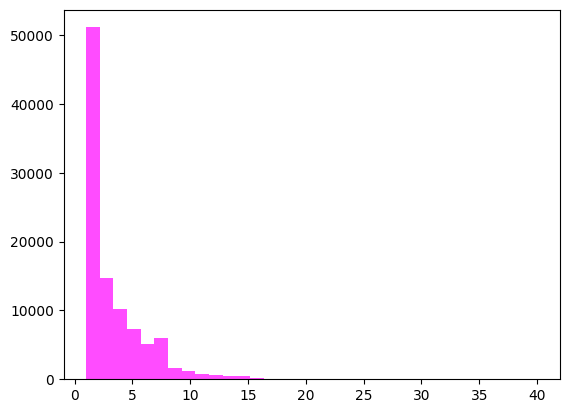

In [ ]:
import time
start = time.time()
def bernoulli(p):
  u = np.random.uniform(low= 0, high= 1)
  if u <= p:
    return 1
  else:
    return 0

def geometrica_ingenua(p):
  i = 0
  j = 0
  while i == 0:
    i = bernoulli(p)
    j += 1
  return j+1

amostra = []

for i in range(100000):
  a = geometrica_ingenua(0.3)
  amostra.append(a) #a = [geometrica_ingenua(0.3) for i in range(1000)]

end = time.time()
print("Tempo:", end - start)
plt.hist(amostra, color = 'magenta', alpha = 0.7, bins=33)

Tempo: 0.6294412612915039


(array([5.0742e+04, 1.4628e+04, 1.0267e+04, 7.3600e+03, 5.0720e+03,
        3.5130e+03, 2.4940e+03, 1.8030e+03, 1.2390e+03, 8.6100e+02,
        5.8900e+02, 4.4700e+02, 3.1200e+02, 2.0700e+02, 1.4400e+02,
        9.7000e+01, 5.9000e+01, 6.0000e+01, 3.5000e+01, 1.8000e+01,
        1.4000e+01, 6.0000e+00, 8.0000e+00, 6.0000e+00, 4.0000e+00,
        3.0000e+00, 2.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ 1.        ,  2.03030303,  3.06060606,  4.09090909,  5.12121212,
         6.15151515,  7.18181818,  8.21212121,  9.24242424, 10.27272727,
        11.3030303 , 12.33333333, 13.36363636, 14.39393939, 15.42424242,
        16.45454545, 17.48484848, 18.51515152, 19.54545455, 20.57575758,
        21.60606061, 22.63636364, 23.66666667, 24.6969697 , 25.72727273,
        26.75757576, 27.78787879, 28.81818182, 29.84848485, 30.87878788,
        31.90909091, 32.93939394, 33.96969697, 35.        ]),
 <BarContainer object of 33 artists>)

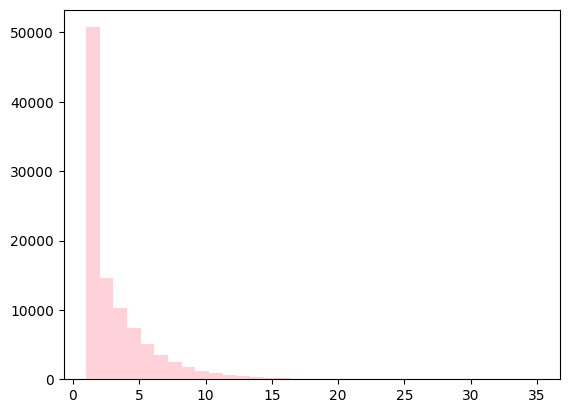

In [ ]:
import time
start = time.time()
def geometrica_inv(p):
  u = np.random.uniform(low= 0, high= 1)
  j = 0
  x = np.floor(np.log(1 - u)/np.log(1-p)) + 1

  return x

b = [geometrica_inv(0.3) for i in range(100000)]
end = time.time()
print("Tempo:", end - start)

plt.hist(b, color = 'pink', alpha = 0.7, bins=33)

Tempo: 0.03838324546813965


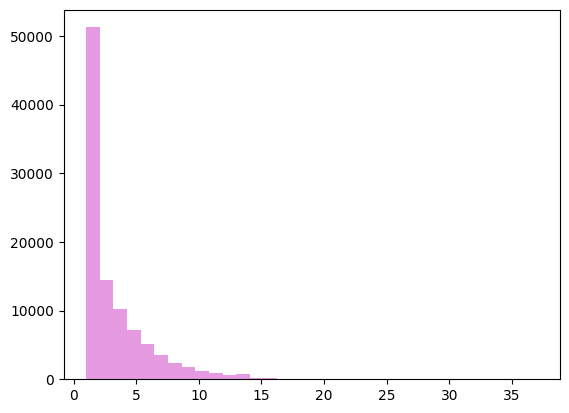

In [ ]:
import time
start = time.time()
amostra_np = np.random.geometric(p=0.3, size=100000)

plt.hist(amostra_np, color = 'orchid', alpha = 0.7, bins=33)
end = time.time()
print("Tempo:", end - start)

(array([5.1261e+04, 1.4464e+04, 1.0176e+04, 7.2060e+03, 5.1160e+03,
        3.5290e+03, 2.3620e+03, 1.7980e+03, 1.2100e+03, 8.7900e+02,
        5.6500e+02, 6.9700e+02, 2.2900e+02, 1.4800e+02, 9.7000e+01,
        6.8000e+01, 6.3000e+01, 3.5000e+01, 3.1000e+01, 1.6000e+01,
        1.1000e+01, 1.4000e+01, 1.4000e+01, 3.0000e+00, 4.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1.        ,  2.09090909,  3.18181818,  4.27272727,  5.36363636,
         6.45454545,  7.54545455,  8.63636364,  9.72727273, 10.81818182,
        11.90909091, 13.        , 14.09090909, 15.18181818, 16.27272727,
        17.36363636, 18.45454545, 19.54545455, 20.63636364, 21.72727273,
        22.81818182, 23.90909091, 25.        , 26.09090909, 27.18181818,
        28.27272727, 29.36363636, 30.45454545, 31.54545455, 32.63636364,
        33.72727273, 34.81818182, 35.90909091, 37.        ]),
 <BarContainer object of 33 artists>)

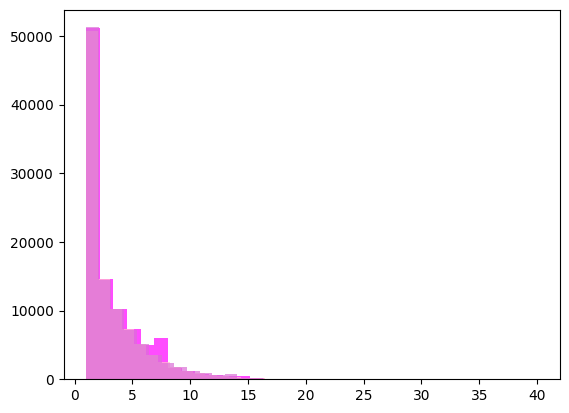

In [ ]:
plt.hist(amostra, color = 'magenta', alpha = 0.7, bins=33)
plt.hist(b, color = 'pink', alpha = 0.7, bins=33)
plt.hist(amostra_np, color = 'orchid', alpha = 0.7, bins=33)

# Exercício 3: Binomial Negativa

1. Implemente um gerador de variáveis aleatórias com distribuição $\mathrm{NegBin}(r, p)$ (número de **ensaios até o $r$-ésimo sucesso**) utilizando **três métodos**:

   - **Versão soma de Bernoullis:** simule sucessivos ensaios $B_i \sim \mathrm{Bernoulli}(p)$ até acumular $r$ sucessos.  
     O número total de ensaios realizados corresponde ao valor de $X$.

   - **Versão soma de geométricas:** gere $r$ variáveis $X_i \sim \text{Geom}(p)$ via inversão, e defina
     $$
     X = X_1 + \cdots + X_r.
     $$

   - **Versão via inversão recursiva:** use $U \sim \text{Uniforme}(0, 1)$, inicialize $n = r$, $p_r = p^r$, $F = p_r$, e atualize
     $$
     p_{n+1} = p_n \cdot \frac{n}{n - r + 1}(1 - p),
     \qquad F \leftarrow F + p_{n+1},
     $$
     até encontrar o menor $n$ tal que $F \ge U$.

2. Para valores fixos de $r$ e $p$ (por exemplo, $r = 5$, $p = 0.3$), gere uma amostra de tamanho $10^5$ utilizando os três métodos.

3. Compare os resultados com a função `numpy.random.negative_binomial(r, p)`:
   $$
   X_{\text{NumPy}} = Y_{\text{NumPy}} + r,
   $$
   onde `numpy.random.negative_binomial(r, p)` retorna $Y$ = número de falhas antes do $r$-ésimo sucesso.

4. Faça gráficos das distribuições empíricas dos quatro métodos e compare com a **PMF teórica**.

5. Compare também o **tempo de execução** dos três métodos de simulação (soma de Bernoullis, soma de geométricas, inversão recursiva) para diferentes valores de $r$ (ex.: $r = 5, 20$) e $p$ (ex.: $0.1, 0.3, 0.5, 0.7, 0.9$). Discuta como $r$ e $p$ afetam a eficiência de cada método.


Tempo: 6.1140456199646


(array([1.0640e+03, 4.6980e+03, 4.1390e+03, 1.1156e+04, 6.5060e+03,
        1.3867e+04, 6.8920e+03, 1.2598e+04, 5.5490e+03, 9.5180e+03,
        4.0320e+03, 6.3330e+03, 4.6570e+03, 1.6540e+03, 2.5510e+03,
        1.0120e+03, 1.4010e+03, 5.0100e+02, 7.1100e+02, 2.5100e+02,
        3.5600e+02, 1.3800e+02, 1.7100e+02, 1.0100e+02, 3.1000e+01,
        5.1000e+01, 1.5000e+01, 1.8000e+01, 1.3000e+01, 1.2000e+01,
        2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 5.        ,  6.54545455,  8.09090909,  9.63636364, 11.18181818,
        12.72727273, 14.27272727, 15.81818182, 17.36363636, 18.90909091,
        20.45454545, 22.        , 23.54545455, 25.09090909, 26.63636364,
        28.18181818, 29.72727273, 31.27272727, 32.81818182, 34.36363636,
        35.90909091, 37.45454545, 39.        , 40.54545455, 42.09090909,
        43.63636364, 45.18181818, 46.72727273, 48.27272727, 49.81818182,
        51.36363636, 52.90909091, 54.45454545, 56.        ]),
 <BarContainer object of 33 artists>)

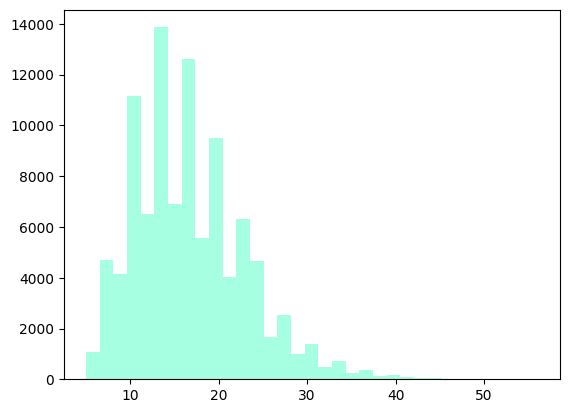

In [ ]:
import time
start = time.time()
def neg_bin_ber(r, p):
  n = 0
  s = 0
  while s < r:
    b = bernoulli(p)
    n += 1
    if b == 1:
      s += 1
  return n

a = [neg_bin_ber(5, 0.3) for i in range(100000)]
end = time.time()
print("Tempo:", end - start)

plt.hist(a, color = 'aquamarine', alpha = 0.7, bins=33)

Tempo: 2.639554262161255


(array([3.0990e+03, 9.6900e+03, 6.7260e+03, 1.5512e+04, 7.9360e+03,
        1.4715e+04, 1.2447e+04, 5.1260e+03, 8.1020e+03, 3.1710e+03,
        4.8600e+03, 1.7550e+03, 2.5680e+03, 1.6640e+03, 6.0600e+02,
        8.1200e+02, 2.8600e+02, 3.8800e+02, 1.2000e+02, 1.9200e+02,
        9.3000e+01, 3.6000e+01, 3.5000e+01, 1.6000e+01, 1.8000e+01,
        9.0000e+00, 7.0000e+00, 3.0000e+00, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 4.        ,  5.57575758,  7.15151515,  8.72727273, 10.3030303 ,
        11.87878788, 13.45454545, 15.03030303, 16.60606061, 18.18181818,
        19.75757576, 21.33333333, 22.90909091, 24.48484848, 26.06060606,
        27.63636364, 29.21212121, 30.78787879, 32.36363636, 33.93939394,
        35.51515152, 37.09090909, 38.66666667, 40.24242424, 41.81818182,
        43.39393939, 44.96969697, 46.54545455, 48.12121212, 49.6969697 ,
        51.27272727, 52.84848485, 54.42424242, 56.        ]),
 <BarContainer object of 33 artists>)

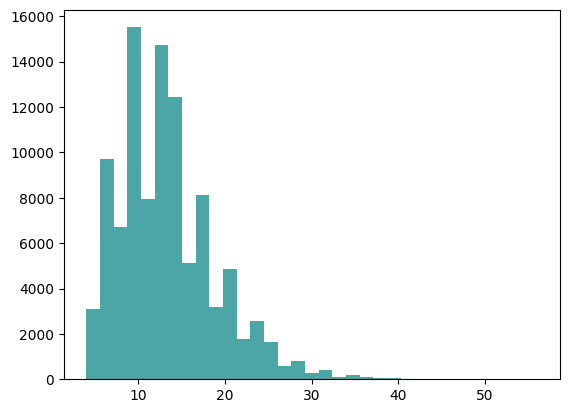

In [ ]:
import time
start = time.time()

def neg_bin_geo(r, p):
  soma_x = 0
  for i in range(1, int(r)):
    x_i = geometrica_inv(p)
    soma_x += x_i
  return soma_x

b = [neg_bin_geo(5, 0.3) for i in range(100000)]
end = time.time()
print("Tempo:", end - start)

plt.hist(b, color = 'teal', alpha = 0.7, bins=33)

Tempo: 0.6098651885986328


(array([1.0550e+03, 4.7980e+03, 9.2810e+03, 1.2509e+04, 6.8560e+03,
        1.3848e+04, 1.2681e+04, 1.0677e+04, 4.4390e+03, 7.3290e+03,
        5.3810e+03, 3.8040e+03, 1.3920e+03, 2.1750e+03, 1.3540e+03,
        9.4600e+02, 3.2200e+02, 4.6200e+02, 2.9100e+02, 1.5800e+02,
        7.0000e+01, 7.3000e+01, 3.9000e+01, 2.7000e+01, 9.0000e+00,
        1.1000e+01, 6.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 5.        ,  6.75757576,  8.51515152, 10.27272727, 12.03030303,
        13.78787879, 15.54545455, 17.3030303 , 19.06060606, 20.81818182,
        22.57575758, 24.33333333, 26.09090909, 27.84848485, 29.60606061,
        31.36363636, 33.12121212, 34.87878788, 36.63636364, 38.39393939,
        40.15151515, 41.90909091, 43.66666667, 45.42424242, 47.18181818,
        48.93939394, 50.6969697 , 52.45454545, 54.21212121, 55.96969697,
        57.72727273, 59.48484848, 61.24242424, 63.        ]),
 <BarContainer object of 33 artists>)

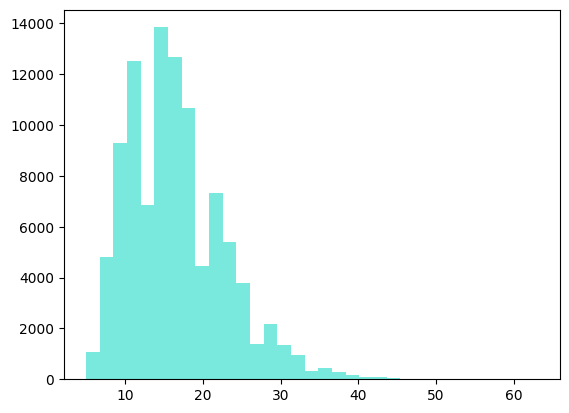

In [ ]:
import time
start = time.time()
def neg_bin_inv(r, p):
  u = np.random.uniform()
  n = r
  p_n = p**r
  f = p_n
  while u > f:
    p_n = p_n*n*(1-p) / (n-r+1)
    n += 1
    f += p_n
  return n

c = [neg_bin_inv(5, 0.3) for i in range(100000)]
end = time.time()
print("Tempo:", end - start)

plt.hist(c, color = 'turquoise', alpha = 0.7, bins=33)

Tempo: 0.05241823196411133


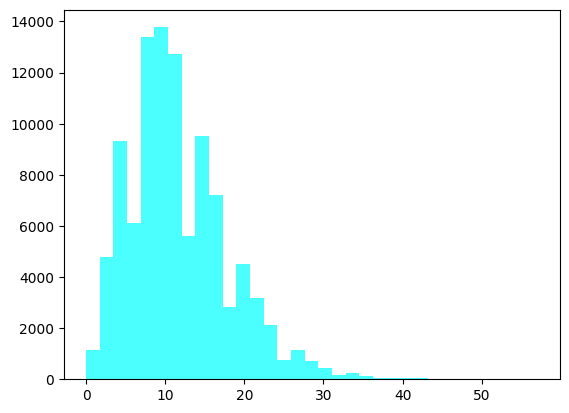

In [ ]:
import time
start = time.time()
d = np.random.negative_binomial(5, 0.3, 100000)

plt.hist(d, color = 'aqua', alpha = 0.7, bins=33)
end = time.time()
print("Tempo:", end - start)

(array([1.1550e+03, 4.7990e+03, 9.3060e+03, 6.1060e+03, 1.3403e+04,
        1.3773e+04, 1.2720e+04, 5.6040e+03, 9.5230e+03, 7.2070e+03,
        2.8260e+03, 4.5240e+03, 3.1700e+03, 2.1300e+03, 7.6100e+02,
        1.1300e+03, 7.1300e+02, 4.3400e+02, 1.5600e+02, 2.2900e+02,
        1.3900e+02, 4.1000e+01, 6.3000e+01, 3.4000e+01, 3.2000e+01,
        5.0000e+00, 6.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.        ,  1.72727273,  3.45454545,  5.18181818,  6.90909091,
         8.63636364, 10.36363636, 12.09090909, 13.81818182, 15.54545455,
        17.27272727, 19.        , 20.72727273, 22.45454545, 24.18181818,
        25.90909091, 27.63636364, 29.36363636, 31.09090909, 32.81818182,
        34.54545455, 36.27272727, 38.        , 39.72727273, 41.45454545,
        43.18181818, 44.90909091, 46.63636364, 48.36363636, 50.09090909,
        51.81818182, 53.54545455, 55.27272727, 57.        ]),
 <BarContainer object of 33 artists>)

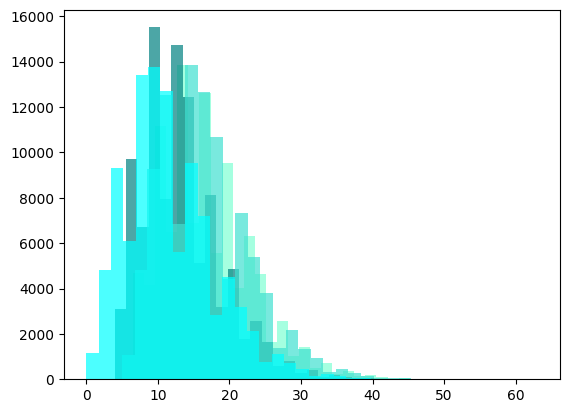

In [ ]:
plt.hist(a, color = 'aquamarine', alpha = 0.7, bins=33)
plt.hist(b, color = 'teal', alpha = 0.7, bins=33)
plt.hist(c, color = 'turquoise', alpha = 0.7, bins=33)
plt.hist(d, color = 'aqua', alpha = 0.7, bins=33)


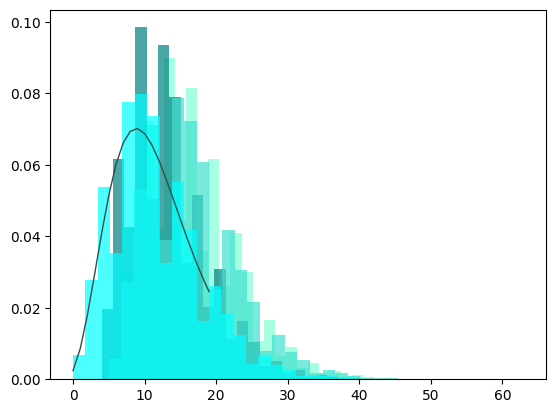

In [ ]:
import math #não sei se poderia usar essa biblioteca, mas u numpy não tem função fatorial

def teorica(x, r, p):
  fat = math.factorial(x+r-1) / (math.factorial(r-1) * math.factorial(x))
  return fat * (1-p)**x * p**r

k = np.arange(0, 20)

plt.plot(k, [teorica(x, r=5, p=0.3) for x in k], color='darkslategray', linewidth = 1)

plt.hist(a, color = 'aquamarine', alpha = 0.7, bins=33, density=True)
plt.hist(b, color = 'teal', alpha = 0.7, bins=33, density=True)
plt.hist(c, color = 'turquoise', alpha = 0.7, bins=33, density=True)
plt.hist(d, color = 'aqua', alpha = 0.7, bins=33, density=True)

plt.show()
#perguntar


In [ ]:
tempo_ber = []
for p in [0.1, 0.3, 0.5, 0.7, 0.9]:
  for r in [5,20]:
    inicio = time.time()
    a = [neg_bin_ber(p, r) for _ in range(10000)]
    fim = time.time()
    tempo_ber.append((p, r, fim - inicio))

print(tempo_ber)

tempo_geo = []
for p in [0.1, 0.3, 0.5, 0.7, 0.9]:
  for r in [5,20]:
    inicio = time.time()
    b = [neg_bin_geo(p, r) for _ in range(10000)]
    fim = time.time()
    tempo_geo.append((p, r, fim - inicio))

print(tempo_geo)

tempo_inv = []
for p in [0.1, 0.3, 0.5, 0.7, 0.9]:
  for r in [5,20]:
    inicio = time.time()
    c = [neg_bin_inv(p, r) for _ in range(10000)]
    fim = time.time()
    tempo_inv.append((p, r, fim - inicio))

print(tempo_inv)


[(0.1, 5, 0.03143191337585449), (0.1, 20, 0.031258344650268555), (0.3, 5, 0.031543731689453125), (0.3, 20, 0.03126788139343262), (0.5, 5, 0.03085184097290039), (0.5, 20, 0.03229570388793945), (0.7, 5, 0.03202009201049805), (0.7, 20, 0.031188488006591797), (0.9, 5, 0.0318453311920166), (0.9, 20, 0.03144192695617676)]
[(0.1, 5, 0.0038666725158691406), (0.1, 20, 0.003116607666015625), (0.3, 5, 0.002768993377685547), (0.3, 20, 0.002721071243286133), (0.5, 5, 0.0027086734771728516), (0.5, 20, 0.0027048587799072266), (0.7, 5, 0.002604961395263672), (0.7, 20, 0.0025954246520996094), (0.9, 5, 0.002596616744995117), (0.9, 20, 0.002615213394165039)]
[(0.1, 5, 0.033637285232543945), (0.1, 20, 0.030405521392822266), (0.3, 5, 0.029870033264160156), (0.3, 20, 0.029542207717895508), (0.5, 5, 0.031177282333374023), (0.5, 20, 0.04817366600036621), (0.7, 5, 0.02969193458557129), (0.7, 20, 0.029925107955932617), (0.9, 5, 0.030125856399536133), (0.9, 20, 0.02968740463256836)]


# Exercício 4: Hipergeométrica

Implemente um gerador de variáveis aleatórias $X \sim \text{Hipergeom}(N,K,n)$ utilizando o **algoritmo de Fisher–Yates parcial** para realizar a amostragem sem reposição.  
Compare o histograma da amostra simulada com a distribuição teórica dada por `scipy.stats.hypergeom.pmf`.


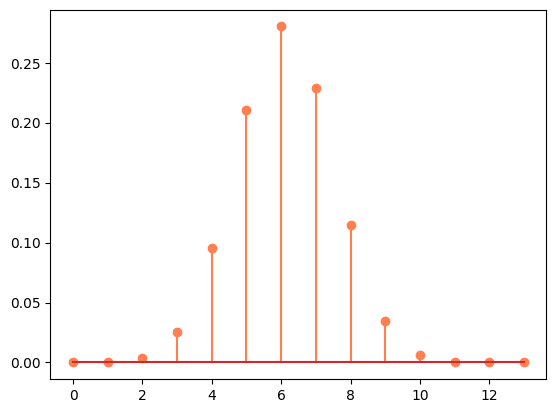

(array([  1.,   2.,  22.,  99., 195., 289., 246., 101.,  40.,   5.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

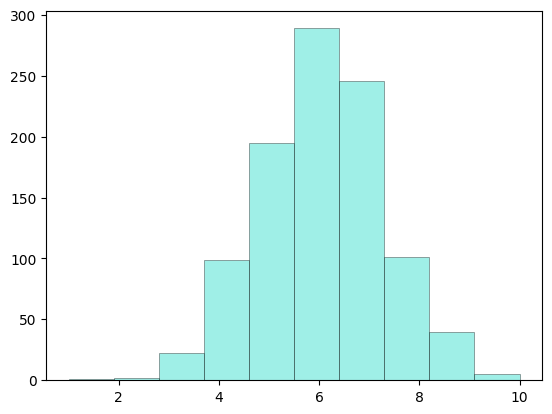

In [ ]:
from scipy.stats import hypergeom

def hipergeom(N, K, n):
  pop = [1]*K + [0]*(N-K)
  for i in range(n):
    j = np.random.randint(i, N) #retorna um valor inteiro direto
    pop[j], pop[i] = pop[i], pop[j]
  return sum(pop[: n])

x = np.arange(0, 14)
b = hypergeom.pmf(x, 32, 15, 13)

plt.stem(x, b, linefmt="coral")
plt.show()

a = [hipergeom(32,15,13) for i in range(1000)]

plt.hist(a, color = 'turquoise', alpha = 0.5, edgecolor = 'black', linewidth = 0.5)